# DS 4400 Project
## Jeremy Cui and Jason Stitt

In [104]:
from nltk.corpus import stopwords
import pandas as pd
import re
import regex
import string
import scipy as scp
import nltk
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeremycui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeremycui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jeremycui/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Loading, Cleaning, Data Exploration

In [105]:
lyrics_df = pd.read_csv('https://cdn-lfs.huggingface.co/datasets/juliensimon/autonlp-data-song-lyrics-demo/367571c0d07193ad0c8d577124d27076615bd98493fc1f5f785771496e673682')

In [130]:
lyrics_df

,Lyric,Genre
0,got butter Aiyo one thing sure keep Keep nice ...,Hip Hop
1,Aye Sean Paul long side mandem called Jay Sean...,Pop
2,Beauty finds refuge Lovers wrapped inside othe...,Indie
3,changed tune many times since weve met Ill alw...,Rock
4,got Js rolled got drinks poured bought bottles...,Hip Hop
...,...,...
48488,Unforgettable face cant think name edge tongue...,Heavy Metal
48489,Shawty swing way put ass face Round round head...,Hip Hop
48490,Born caught Care fear Gear heart Meanings Fear...,Rock
48491,Ive got nothing say today used words yesterday...,Heavy Metal


In [106]:
val_df = pd.read_csv('https://cdn-lfs.huggingface.co/datasets/juliensimon/autonlp-data-song-lyrics-demo/709af4b6afd2d6bfd890e558c61aba15068e4758417abfb5d86bdbd0397431da')

In [107]:
stop_word = stopwords.words('English')
stop_words = []
for word in stop_word:
    wo = re.sub("'", "", word)
    stop_words.append(wo)



In [108]:
# cleaning data
new_lyrics = []

for lyrics in lyrics_df['Lyric'].tolist():
    
    lyrics_n = re.sub("([\(\[]).*?([\)\]])", "", lyrics)
    lyrics_n2 = lyrics_n.translate(str.maketrans('', '', string.punctuation))
    lyrics_n3 = re.sub(' +', ' ', lyrics_n2)
    lyrics_n4 = re.sub(r'[0-9]+', '', lyrics_n3)
    
    new_list_song = []
    for word in lyrics_n4.split():
        if word.lower() not in stop_words:
            new_list_song.append(word)
            new_song = " ".join(new_list_song)
    
    new_lyrics.append(new_song)
    
lyrics_df['Lyric'] = new_lyrics

In [109]:
# cleaning test data
new_lyrics_ = []

for lyrics in val_df['Lyric'].tolist():
    
    lyrics_n = re.sub("([\(\[]).*?([\)\]])", "", lyrics)
    lyrics_n2 = lyrics_n.translate(str.maketrans('', '', string.punctuation))
    lyrics_n3 = re.sub(' +', ' ', lyrics_n2)
    lyrics_n4 = re.sub(r'[0-9]+', '', lyrics_n3)
    
    new_list_song = []
    for word in lyrics_n4.split():
        if word.lower() not in stop_words:
            new_list_song.append(word)
            new_song = " ".join(new_list_song)
    
    new_lyrics_.append(new_song)
    
val_df['Lyric'] = new_lyrics_

In [110]:
lyrics_df.rename(columns={'Genre0': 'Genre'}, inplace=True)
lyrics_df
print(lyrics_df['Genre'].value_counts())
val_df.rename(columns={'Genre0': 'Genre'}, inplace=True)

Rock           18993
Pop            11162
Hip Hop         8898
Indie           5113
Heavy Metal     2739
Dance           1588
Name: Genre, dtype: int64


In [113]:
lyrics_df.describe()

,Lyric,Genre
count,48493,48493
unique,48112,6
top,Instrumental Linkin Park Underground,Rock
freq,10,18993


In [114]:
# split songs by genres
hip_hop = lyrics_df[lyrics_df['Genre'] == 'Hip Hop']
hh_string = ' '.join(hip_hop['Lyric'].tolist())
rock = lyrics_df[lyrics_df['Genre'] == 'Rock']
rock_string = ' '.join(rock['Lyric'].tolist())
pop = lyrics_df[lyrics_df['Genre'] == 'Pop']
pop_string = ' '.join(pop['Lyric'].tolist())
indie = lyrics_df[lyrics_df['Genre'] == 'Indie']
indie_string = ' '.join(indie['Lyric'].tolist())
dance = lyrics_df[lyrics_df['Genre'] == 'Dance']
dance_string = ' '.join(dance['Lyric'].tolist())
metal = lyrics_df[lyrics_df['Genre'] == 'Heavy Metal']
metal_string = ' '.join(metal['Lyric'].tolist())

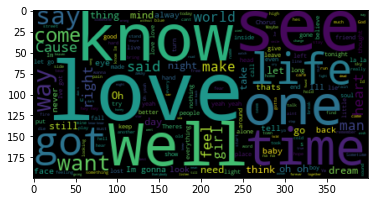

In [115]:
wordcloud = WordCloud().generate(rock_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

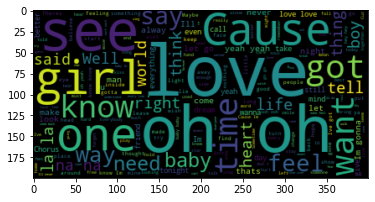

In [116]:
wordcloud = WordCloud().generate(pop_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

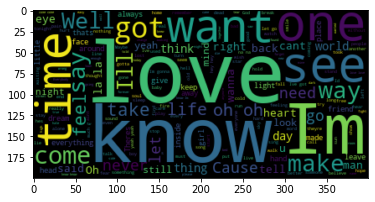

In [117]:
wordcloud = WordCloud().generate(indie_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

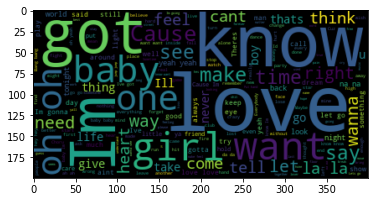

In [118]:
wordcloud = WordCloud().generate(dance_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

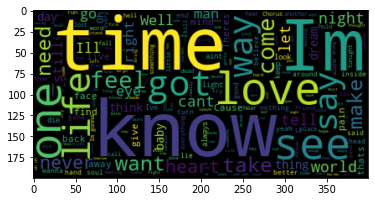

In [119]:
wordcloud = WordCloud().generate(metal_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [137]:
lemma_df = pd.DataFrame(columns= ['Lyric','Genre'])
lemma_df['Genre'] = lyrics_df['Genre']

In [138]:
len(lemma_df['Lyric'])

48493

In [139]:
len(lyrics_df)

48493

In [140]:
lemma_df_test = pd.DataFrame(columns= ['Lyric','Genre'])
lemma_df_test['Genre'] = val_df['Genre']

In [142]:
# lemmatizing lyrics
song_list_full = []
for lyric in lyrics_df['Lyric'].to_list():
    new_song_list = []
    new_song = ""
    for word in lyric.split():
        lem = WordNetLemmatizer()
        lemm = lem.lemmatize(word, pos='v')
        new_song_list.append(lemm)
        new_song = " ".join(new_song_list)
    song_list_full.append(new_song)
lemma_df['Lyric'] = song_list_full
#print(len(song_list_full))

In [143]:
# lemmatizing lyrics for testing
song_list_full = []
for lyric in val_df['Lyric'].to_list():
    new_song_list = []
    new_song = ""
    for word in lyric.split():
        lem = WordNetLemmatizer()
        lemm = lem.lemmatize(word, pos='v')
        new_song_list.append(lemm)
        new_song = " ".join(new_song_list)
    song_list_full.append(new_song)
lemma_df_test['Lyric'] = song_list_full

In [144]:
# Getting Rid of Instrumental Songs - to be safe, removed any song with 'instrumental' in lyrics - only 50 songs
lemma_df_instrumentals = lemma_df[lemma_df['Lyric'].str.contains('Instrumental')]
cond = lemma_df['Lyric'].isin(lemma_df_instrumentals['Lyric'])
lemma_df.drop(lemma_df[cond].index, inplace = True)
lemma_df

lemma_df_test_instrumentals = lemma_df_test[lemma_df_test['Lyric'].str.contains('Instrumental')]
cond2 = lemma_df_test['Lyric'].isin(lemma_df_test_instrumentals['Lyric'])
lemma_df_test.drop(lemma_df_test[cond2].index, inplace = True)


In [147]:
# Evening distribution of Genres as well as possible (maintaining 20,000 rows)
hip_hop_df = lemma_df[lemma_df['Genre'] == 'Hip Hop'].sample(n=4000)
rock_df = lemma_df[lemma_df['Genre'] == 'Rock'].sample(n=4000)
pop_df = lemma_df[lemma_df['Genre'] == 'Pop'].sample(n=4000)
indie_df = lemma_df[lemma_df['Genre'] == 'Indie'].sample(n=4000)
dance_df = lemma_df[lemma_df['Genre'] == 'Dance']
metal_df = lemma_df[lemma_df['Genre'] == 'Heavy Metal']

dfs_concat = [hip_hop_df, rock_df, pop_df, indie_df, dance_df, metal_df]

training_songs = pd.concat(dfs_concat)



In [148]:
print(training_songs['Genre'].value_counts())
training_songs.describe()

Hip Hop        4000
Rock           4000
Pop            4000
Indie          4000
Heavy Metal    2737
Dance          1587
Name: Genre, dtype: int64


,Lyric,Genre
count,20324,20324
unique,20253,6
top,Waking dead inside head never never med medici...,Hip Hop
freq,2,4000


### Obtaining Features

In [279]:
# tf-idf to obtain features, encoding response (genre)
# model improvement: set mind_df to lower bound of df(t) document frequency term t to limit vocabulary
vectorizer = TfidfVectorizer(use_idf=True)
number_songs = 3000
sampled_training_df = training_songs.sample(n=number_songs)
# fit lyrics to TfidfVectorizer
vectors = vectorizer.fit_transform(sampled_training_df['Lyric'].to_list())
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
dense_list = dense.tolist()
training_df = pd.DataFrame(dense_list, columns=feature_names)
le = LabelEncoder()
training_df['Genre'] = le.fit_transform(sampled_training_df['Genre'])

In [343]:
# tf-idf to obtain features, encoding response (genre)
vectorizer_mdf3 = TfidfVectorizer(min_df=3)
# fit lyrics to TfidfVectorizer
vectors = vectorizer_mdf3.fit_transform(sampled_training_df['Lyric'].to_list())
feature_names_mdf3 = vectorizer_mdf3.get_feature_names_out()
dense = vectors.todense()
dense_list = dense.tolist()
training_df_mdf3 = pd.DataFrame(dense_list, columns=feature_names_mdf3)
le = LabelEncoder()
training_df_mdf3['Genre'] = le.fit_transform(sampled_training_df['Genre'])

In [231]:
# tf-idf to obtain features, encoding response (genre)
# model improvement: set mind_df to lower bound of df(t) document frequency term t to limit vocabulary
vectorizer_mdf10 = TfidfVectorizer(min_df=10, use_idf=True)
number_songs = 3000
sampled_training_df = training_songs.sample(n=number_songs)
# fit lyrics to TfidfVectorizer
vectors_mdf10 = vectorizer_mdf10.fit_transform(sampled_training_df['Lyric'].to_list())
feature_names_mdf10 = vectorizer_mdf10.get_feature_names_out()
dense = vectors_mdf10.todense()
dense_list = dense.tolist()
training_dfmdf10 = pd.DataFrame(dense_list, columns=feature_names_mdf10)
le = LabelEncoder()
training_dfmdf10['Genre'] = le.fit_transform(sampled_training_df['Genre'])


In [280]:
training_df

,aa,aaa,aaaaaaa,aaaaaaaaaaah,aaaaah,aaaah,aaaahhhhh,aaaall,aaah,aaahhhh,...,zzzt,¹m,ºore,árvore,âim,œhe,œi,œyou,ˆil,Genre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [232]:
training_dfmdf10

,abandon,able,abuse,ac,accept,account,ace,ache,acid,across,...,you,young,younger,yous,youth,youâ,zero,zip,zone,Genre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.053581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115694,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.052455,0.075713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [233]:
# tf-idf to obtain features, encoding response (genre)
# model improvement: set mind_df to lower bound of df(t) document frequency term t to limit vocabulary
vectorizer_mdf100 = TfidfVectorizer(min_df=100, use_idf=True)
number_songs = 3000
sampled_training_df = training_songs.sample(n=number_songs)
# fit lyrics to TfidfVectorizer
vectors_mdf100 = vectorizer_mdf100.fit_transform(sampled_training_df['Lyric'].to_list())
feature_names_mdf100 = vectorizer_mdf100.get_feature_names_out()
dense = vectors_mdf100.todense()
dense_list = dense.tolist()
training_dfmdf100 = pd.DataFrame(dense_list, columns=feature_names_mdf100)
le = LabelEncoder()
training_dfmdf100['Genre'] = le.fit_transform(sampled_training_df['Genre'])

In [234]:
training_dfmdf100

,act,aint,air,alive,alone,along,alright,always,another,anything,...,wrong,ya,yall,yeah,year,years,yes,yo,young,Genre
0,0.0,0.123067,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.040891,0.0,...,0.0,0.0,0.000000,0.000000,0.056771,0.0,0.0,0.000000,0.0,2
1,0.0,0.000000,0.296710,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.179323,0.000000,0.0,0.0,0.000000,0.0,4
2,0.0,0.471037,0.000000,0.0,0.047808,0.0,0.184695,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.478789,0.000000,0.0,0.0,0.000000,0.0,1
3,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,3
4,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.000000,0.000000,0.0,0.077663,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.092853,0.000000,0.108611,0.0,0.0,0.000000,0.0,2
2996,0.0,0.000000,0.086865,0.0,0.000000,0.0,0.526543,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1
2997,0.0,0.000000,0.000000,0.0,0.040792,0.0,0.000000,0.0,0.041090,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,5
2998,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.046870,0.042542,0.0,0.0,0.000000,0.0,0


In [282]:
number_songs = 3000
sampled_test_df = lemma_df.sample(n=number_songs)
vectors_mdf_te = vectorizer.transform(sampled_test_df['Lyric'].to_list())
dense = vectors_mdf_te.todense()
dense_list = dense.tolist()
testing_df = pd.DataFrame(dense_list, columns=feature_names)
testing_df['Genre'] = le.transform(sampled_test_df['Genre'])
# Heavy Metal = 1
# Hip-hop = 2
# Indie = 3
# Pop = 4
# Rock = 5
# Dance = 6


In [344]:
vectorizer_mdf3_te = vectorizer_mdf3.transform(sampled_test_df['Lyric'].to_list())
# turns sparse vector to dense vector
dense = vectorizer_mdf3_te.todense()
dense_list = dense.tolist()
testing_df_mdf3 = pd.DataFrame(dense_list, columns=feature_names_mdf3)
testing_df_mdf3['Genre'] = le.transform(sampled_test_df['Genre'])

In [238]:
number_songs = 3000
sampled_test_df_mdf = lemma_df.sample(n=number_songs)
vectors_mdf10_te = vectorizer_mdf10.transform(sampled_test_df_mdf['Lyric'].to_list())

dense = vectors_mdf10_te.todense()
dense_list = dense.tolist()
testing_dfmdf10 = pd.DataFrame(dense_list, columns=feature_names_mdf10)
testing_dfmdf10['Genre'] = le.transform(sampled_test_df_mdf['Genre'])
# Heavy Metal = 1

In [283]:
testing_df

,aa,aaa,aaaaaaa,aaaaaaaaaaah,aaaaah,aaaah,aaaahhhhh,aaaall,aaah,aaahhhh,...,zzzt,¹m,ºore,árvore,âim,œhe,œi,œyou,ˆil,Genre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [239]:
testing_dfmdf10

,abandon,able,abuse,ac,accept,account,ace,ache,acid,across,...,you,young,younger,yous,youth,youâ,zero,zip,zone,Genre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.421477,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.076884,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.104616,0.0,0.0,0.00000,0.0,0.000000,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.062337,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.08748,0.0,0.073938,2
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.062982,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,2
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,3
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,5


In [241]:
number_songs = 3000
sampled_test_df_mdf = lemma_df.sample(n=number_songs)
vectors_mdf100_te = vectorizer_mdf100.transform(sampled_test_df_mdf['Lyric'].to_list())

dense = vectors_mdf100_te.todense()
dense_list = dense.tolist()
testing_dfmdf100 = pd.DataFrame(dense_list, columns=feature_names_mdf100)
testing_dfmdf100['Genre'] = le.transform(sampled_test_df_mdf['Genre'])

In [242]:
testing_dfmdf100

,act,aint,air,alive,alone,along,alright,always,another,anything,...,wrong,ya,yall,yeah,year,years,yes,yo,young,Genre
0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.024802,0.0,0.00000,...,0.000000,0.000000,0.0,0.040712,0.0,0.0,0.033513,0.0,0.000000,4
1,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.052280,0.0,0.00000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,4
2,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.082712,0.0,0.00000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,4
3,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.00000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,3
4,0.0,0.067128,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.00000,...,0.046486,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.052228,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.000000,0.0,0.0,0.07983,0.0,0.0,0.000000,0.0,0.00000,...,0.000000,0.081775,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,5
2996,0.0,0.030754,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.00000,...,0.000000,0.000000,0.0,0.031260,0.0,0.0,0.000000,0.0,0.000000,4
2997,0.0,0.036354,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.06177,...,0.000000,0.000000,0.0,0.073905,0.0,0.0,0.000000,0.0,0.000000,0
2998,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.00000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,1


## Models

In [332]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [327]:
X_train, y_train = training_df.iloc[:,:-1], training_df.iloc[:,-1]

In [345]:
X_train_mdf3, y_train_mdf3 = training_df_mdf3.iloc[:,:-1], training_df_mdf3.iloc[:,-1]

In [324]:
y_train_lb = label_binarize(training_df.iloc[:,-1], classes=[0, 1, 2, 3, 4, 5])

In [245]:
X_train_mdf10, y_train_mdf10 = training_dfmdf10.iloc[:,:-1], training_dfmdf10.iloc[:,-1]

In [338]:
ovr_clf = OneVsRestClassifier(LinearSVC(random_state=3))

In [325]:
lr_lb = LogisticRegression(multi_class='multinomial', random_state=1)

In [339]:
y_train_bi = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5])

In [340]:
y_test_bi = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

In [342]:
y_score = ovr_clf.fit(X_train, y_train_lb).decision_function(X_test)

### Logistic Regression

In [314]:
logreg_model = LogisticRegression(multi_class='multinomial', random_state=1)

In [315]:
logreg_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=1)

In [316]:
X_test, y_test = testing_df.iloc[:,:-1], testing_df.iloc[:,-1]

In [317]:
X_test

,aa,aaa,aaaaaaa,aaaaaaaaaaah,aaaaah,aaaah,aaaahhhhh,aaaall,aaah,aaahhhh,...,zzs,zzzt,¹m,ºore,árvore,âim,œhe,œi,œyou,ˆil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [318]:
X_train

,aa,aaa,aaaaaaa,aaaaaaaaaaah,aaaaah,aaaah,aaaahhhhh,aaaall,aaah,aaahhhh,...,zzs,zzzt,¹m,ºore,árvore,âim,œhe,œi,œyou,ˆil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [319]:
y_pred = logreg_model.predict(X_test)

In [320]:
y_pred

array([3, 3, 2, ..., 4, 3, 2])

In [321]:
# Metrics for base Logistic regression
base_acc = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
base_prec = precision_score(y_test, y_pred, average='macro')
print(precision_score(y_test, y_pred, average='macro'))
base_rec = recall_score(y_test, y_pred, average='macro')
print(recall_score(y_test, y_pred, average='macro'))
base_f1 = f1_score(y_test, y_pred, average='macro')
print(f1_score(y_test, y_pred, average='macro'))
# Roc curve is only for binary classification?
plot_roc_curve(logreg_model, X_test, y_test)

0.4583333333333333
0.43301198763068344
0.431171453605745
0.3987042023483977


/Users/jeremycui/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: Expected 'estimator' to be a binary classifier, but got LogisticRegression fit on multiclass (6 classes) data

In [246]:
logreg_model_mdf10 = LogisticRegression(multi_class='multinomial', random_state=1)

In [247]:
logreg_model_mdf10.fit(X_train_mdf10, y_train_mdf10)

LogisticRegression(multi_class='multinomial', random_state=1)

In [287]:
testing_dfmdf10

,abandon,able,abuse,ac,accept,account,ace,ache,acid,across,...,you,young,younger,yous,youth,youâ,zero,zip,zone,Genre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.421477,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.076884,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.104616,0.0,0.0,0.00000,0.0,0.000000,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.062337,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.08748,0.0,0.073938,2
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.062982,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,2
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,3
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,5


In [249]:
X_test_mdf10, y_test_mdf10 = testing_dfmdf10.iloc[:,:-1], testing_dfmdf10.iloc[:,-1]

In [250]:
y_pred_mdf10 = logreg_model_mdf10.predict(X_test_mdf10)

In [253]:
# Metrics for base Logistic regression
base_acc_mdf10 = accuracy_score(y_test_mdf10, y_pred_mdf10)
print(accuracy_score(y_test_mdf10, y_pred_mdf10))
base_prec_mdf10 = precision_score(y_test_mdf10, y_pred_mdf10, average='macro')
print(precision_score(y_test_mdf10, y_pred_mdf10, average='macro'))
base_rec_mdf10 = recall_score(y_test_mdf10, y_pred_mdf10, average='macro')
print(recall_score(y_test_mdf10, y_pred_mdf10, average='macro'))
base_f1_mdf10 = f1_score(y_test_mdf10, y_pred_mdf10, average='macro')
print(f1_score(y_test_mdf10, y_pred_mdf10, average='macro'))

0.43766666666666665
0.40241307889366534
0.39480261185795024
0.37130155200988985


### Random Forest

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [263]:
rf300 = RandomForestClassifier(n_estimators=300)
scores300 = cross_val_score(rf300,X_train,y_train.values,cv=5)

In [265]:
rf200 = RandomForestClassifier(n_estimators=200)
scores200 = cross_val_score(rf200,X_train,y_train.values,cv=5)

In [266]:
rf100 = RandomForestClassifier(n_estimators=100)
scores100 = cross_val_score(rf100,X_train,y_train.values,cv=5)

In [264]:
scores300

array([0.44333333, 0.475     , 0.43333333, 0.43833333, 0.46333333])

In [267]:
scores200

array([0.41166667, 0.45666667, 0.45333333, 0.42833333, 0.45833333])

In [268]:
scores100

array([0.405     , 0.445     , 0.43333333, 0.42      , 0.435     ])

### AdaBoost

In [272]:
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

In [300]:
ada_clf_ne10 = AdaBoostClassifier(n_estimators=10, random_state=1)

In [293]:
ada_clf_ne100 = AdaBoostClassifier(n_estimators=100, random_state=1)

In [294]:
ada_clf_ne100.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [284]:
ada_clf_ne100.predict(X_test)

array([3, 0, 3, ..., 3, 3, 3])

In [295]:
ada_clf_ne100.score(X_test, y_test)

0.32166666666666666

In [296]:
ada_clf_ne100.fit(X_train_mdf10, y_train_mdf10)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [297]:
ada_clf_ne100.score(X_test_mdf10, y_test_mdf10)

0.328

In [298]:
ada_clf_ne300 = AdaBoostClassifier(n_estimators=300, random_state=1)

In [299]:
ada_clf_ne300.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=300, random_state=1)

In [301]:
ada_clf_ne300.score(X_test, y_test)

0.3566666666666667